# ESG Funds Analysis
### The objective of this analysis is to carry out an evaluation of multiple ESG Funds and compare them with the Market

#### The following analysis will provide the answers to three specific questions:

1. Are ESG Funds more volatile than the market?
2. Are ESG Funds correlated to the market?
3. Which funds are providing higher Risk Adjusted Returns?

####  This project follows the CRISP-DM process
1. Developing Business understanding
2. Developing Data understanding
3. Preparing the data to be analysed
4. Modelling the data
5. Evaluate the results

####  This code is structured to follow the below code steps:
1. Gather & Visualize Stocks Data
2. Assess & Visualize Data
3. Clean Data
4. Analyze and Visualize Data
5. Model Data
6. Visualize the Model

###  Project CRISP-DM steps: 1. Developing Business understanding
The ETFs chosen for this analysis can be found here:
* [Link to ETFs list](https://etfdb.com/etfs/investment-style/socially-responsible/)

A descriptive list has also been reported here below:
* SPDR S&P 500 ETF (SPY)
* Columbia Select Large Cap Growth Inst (UMLGX)
* US Vegan Climate ETF (VEGN)
* Green Century Equity Individual Investor (GCEQX)
* VALIC Company I Large Capital Growth (VLCGX)
* MFS Massachusetts Inv Gr Stk A (MIGFX)
* Vanguard Mega Cap Growth ETF (MGK)
* Dreyfus Appreciation Investor (DGAGX)
* Ave Maria Growth (AVEGX)
* Polen Growth Institutional (POLIX)
* JPMorgan Growth Advantage A (VHIAX)

An ETF is a fund formed by a collection of companies’ stocks and is traded on stock exchanges. Among these funds there are special ETFs which attempt to replicate the market.

The fund chosen to represent the Market is the SP500 in the form of ETF, more specifically the State Street SPDR (SPY).

###  Project CRISP-DM steps: 2. Developing Data understanding

The data used in this analysis is stocks data. The funds presented in the previous section are all traded on exchange and their data is publicly available and is recorded with daily frequency.

The main data point that we will take into consideration is the stock price also known as stock returns and we will transform it into percentage change and log returns (both versus previous day price)

###  Project CRISP-DM steps: 3. Preparing the data to be analysed

In our case the dataset is not physically stored in a file or repository but accessed every time that the code runs. In order to carry out this operation the code gets access to the free Yahoo Finance APIs thanks to the Pandas Datareader library.

The date range selected includes one year worth of stock data starting on January 2019 and ending with the date in which the code runs.

#### Code steps: 1. Gather & Visualize Stocks Data

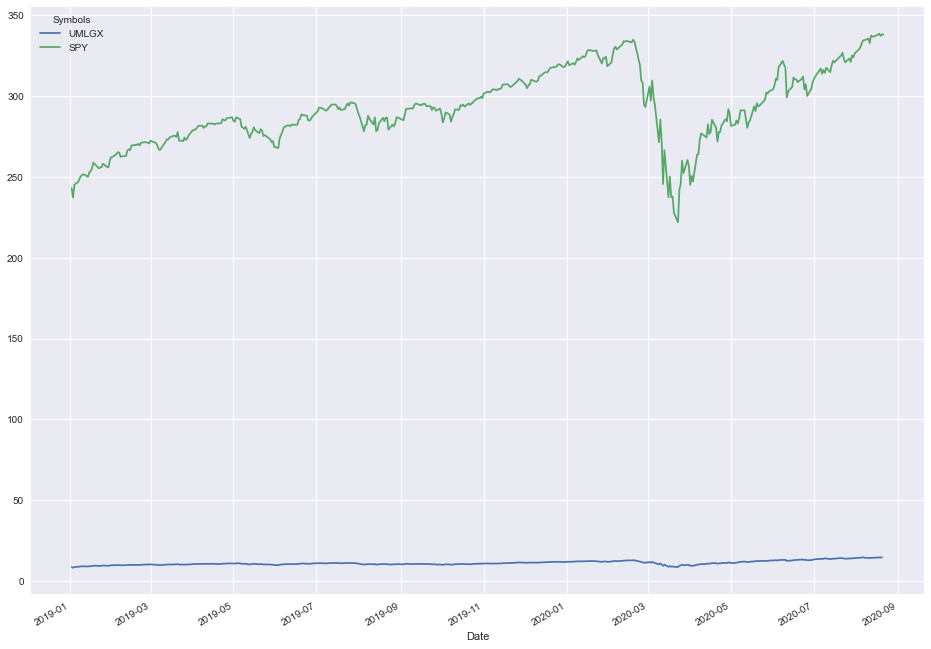

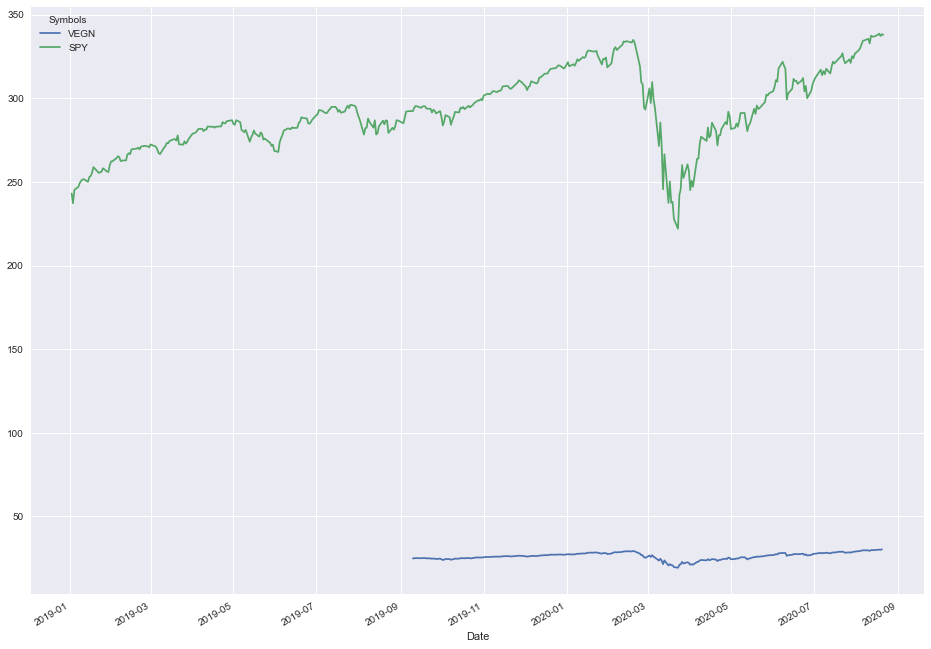

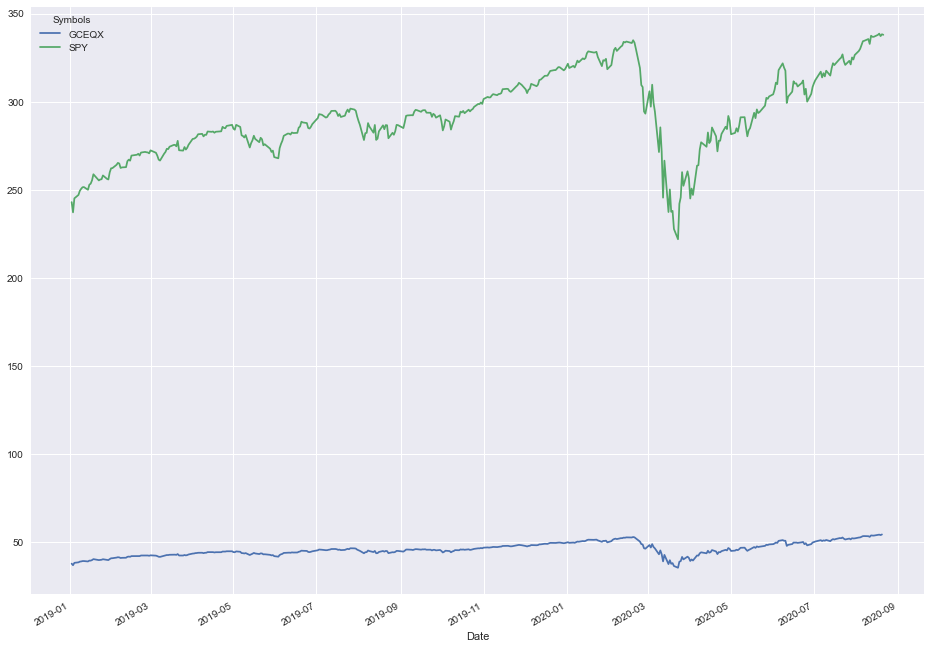

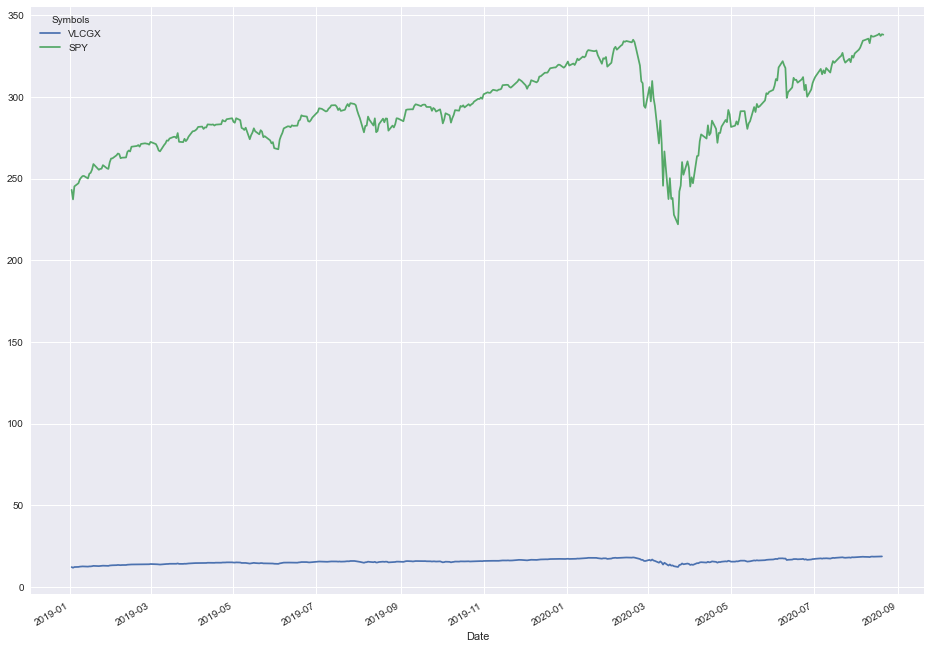

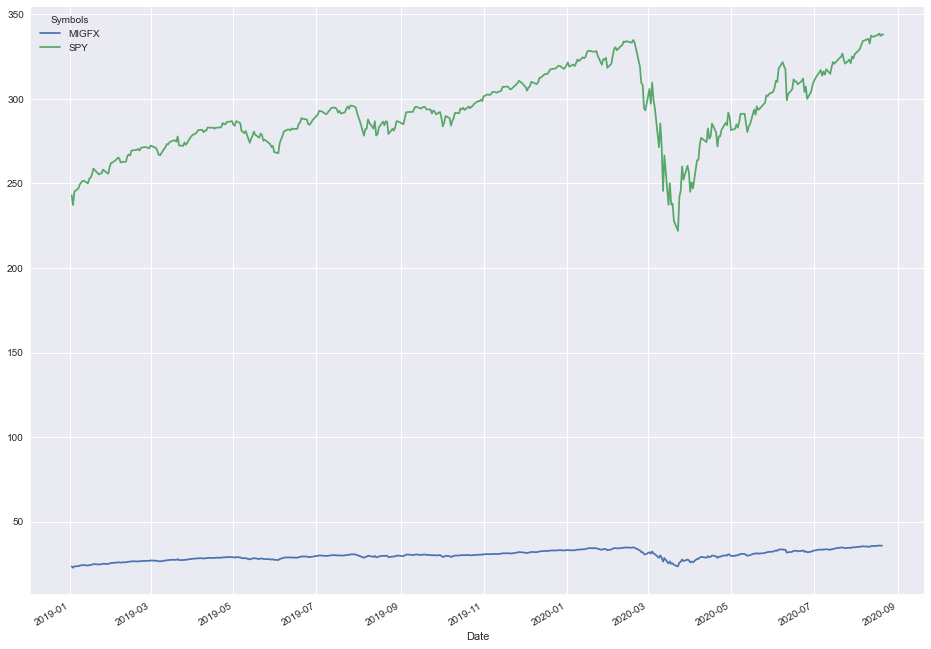

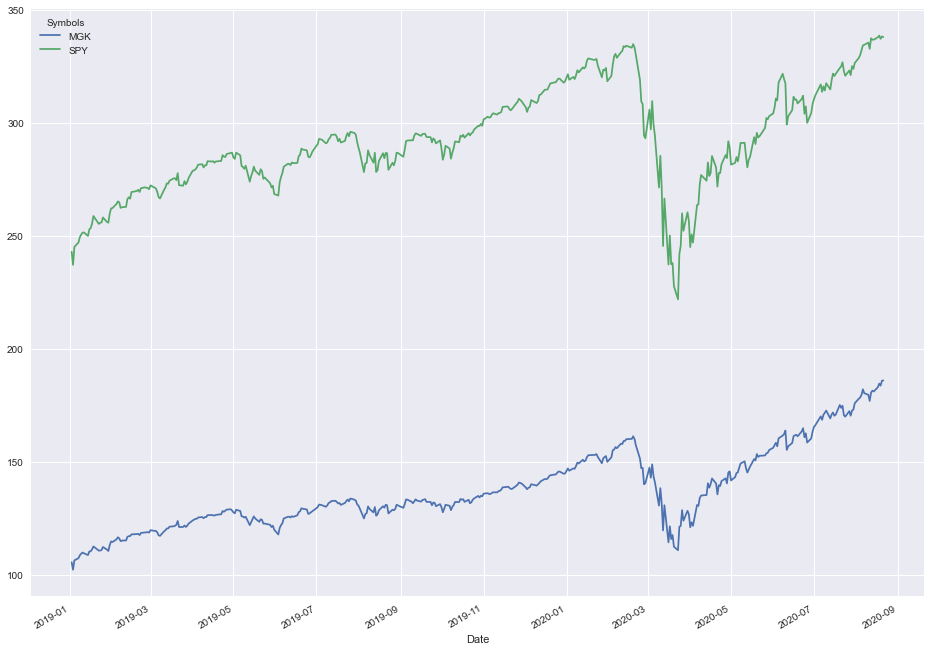

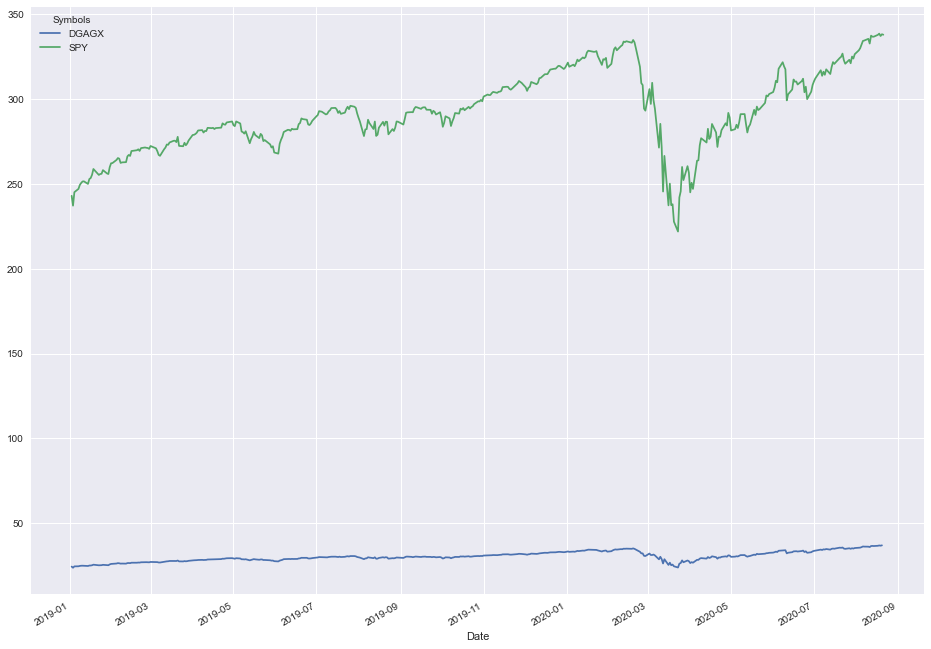

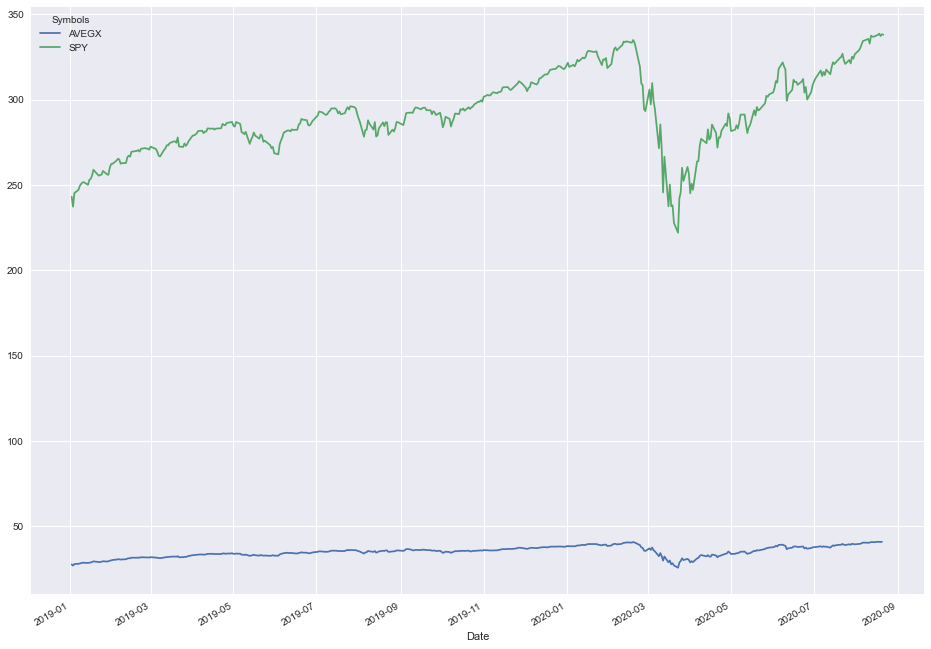

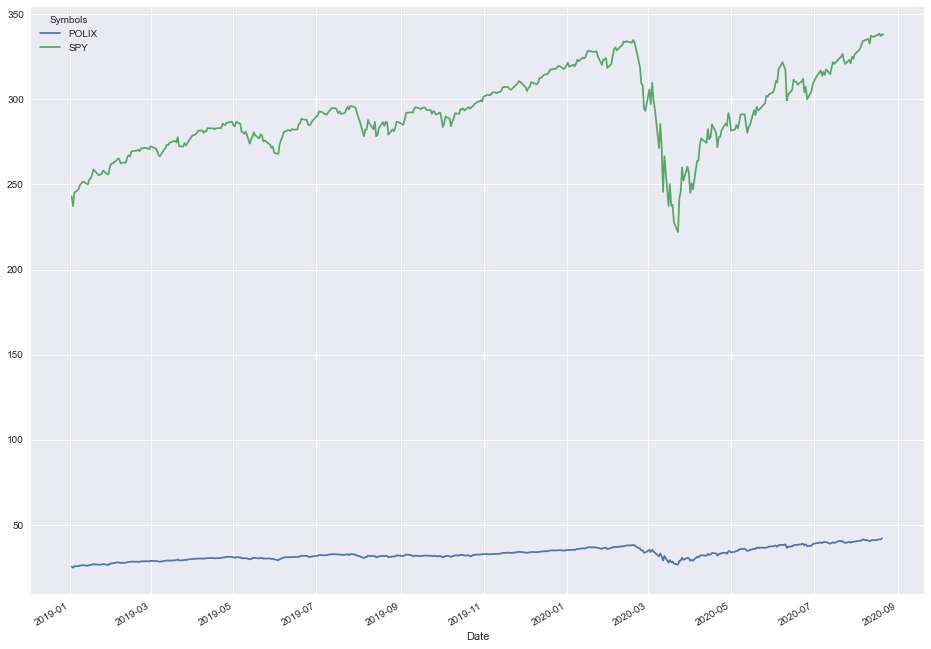

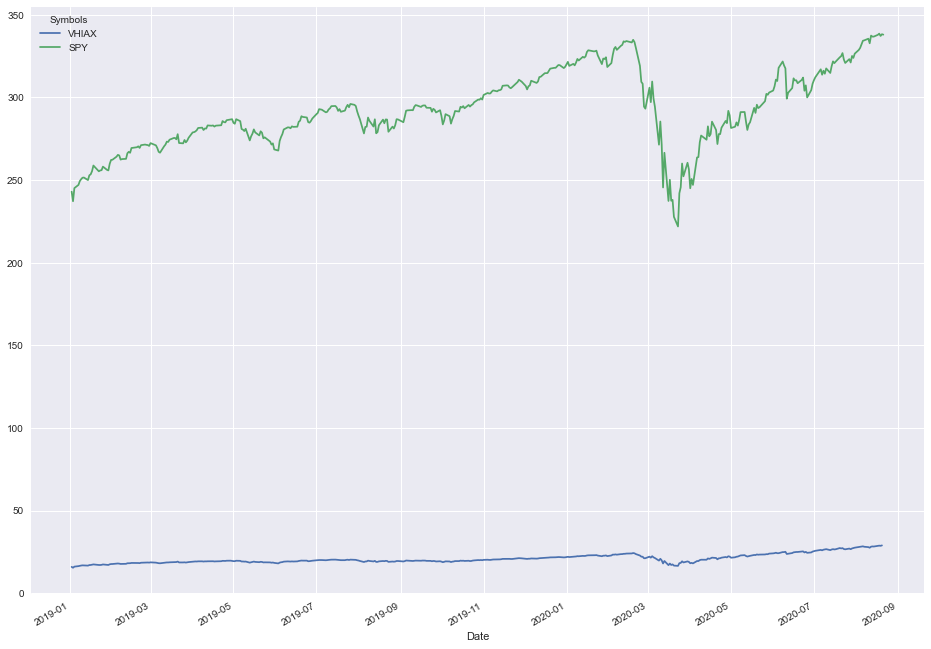

In [9]:
#Import libraries
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from functools import reduce
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import itertools
from datetime import datetime
%matplotlib inline

#Define Ticker Lists 
TickersList = ['SPY', 'UMLGX', 'VEGN', 'GCEQX','VLCGX','MIGFX','MGK','DGAGX', 'AVEGX', 'POLIX', 'VHIAX']#,'XZMU.DE','IESG.L']

#Define Date Range
start_date = '2019-01-01'
#end_date = '2020-08-14'
end_date = datetime.today().strftime('%Y-%m-%d')

#Plot each Fund paired with the market in order to visually compare volatility & returns
for Ticker in TickersList:
    if Ticker != 'SPY':
        Tickerlst = Ticker, 'SPY'
        #print(lst)
        pairedstocksdata = web.DataReader(Tickerlst, 'yahoo', start_date, end_date)['Adj Close']
        plt.style.use('seaborn')
        pairedstocksdata.plot(figsize=(16, 12),legend=True)

plt.style.use('seaborn')

def setdfs():
    '''Set one dataframe for each ticker containing the ESG Fund data'''
    for Ticker in TickersList:
        globals()[Ticker] = web.DataReader(Ticker, 'yahoo', start_date, end_date)
        #print('Ticker_' + Ticker)
    
setdfs()

#Define dataframes used by the pctchg() function
alldfs = [SPY, UMLGX, VEGN, GCEQX, VLCGX, MIGFX, MGK, DGAGX, AVEGX, POLIX, VHIAX]#, XZMUDE, IESGL]

def pctchg():
    '''Calculate & Plot the Daily Returns for each dataframe loaded in the setdfs() function'''
    for df in alldfs:
        df['Daily Return'] = df['Adj Close'].pct_change()  
        df['log_ret'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
        df = df[['Adj Close','Daily Return','log_ret']]
        #display(df)
pctchg()

#### Code steps: 2. Assess & Visualize Data

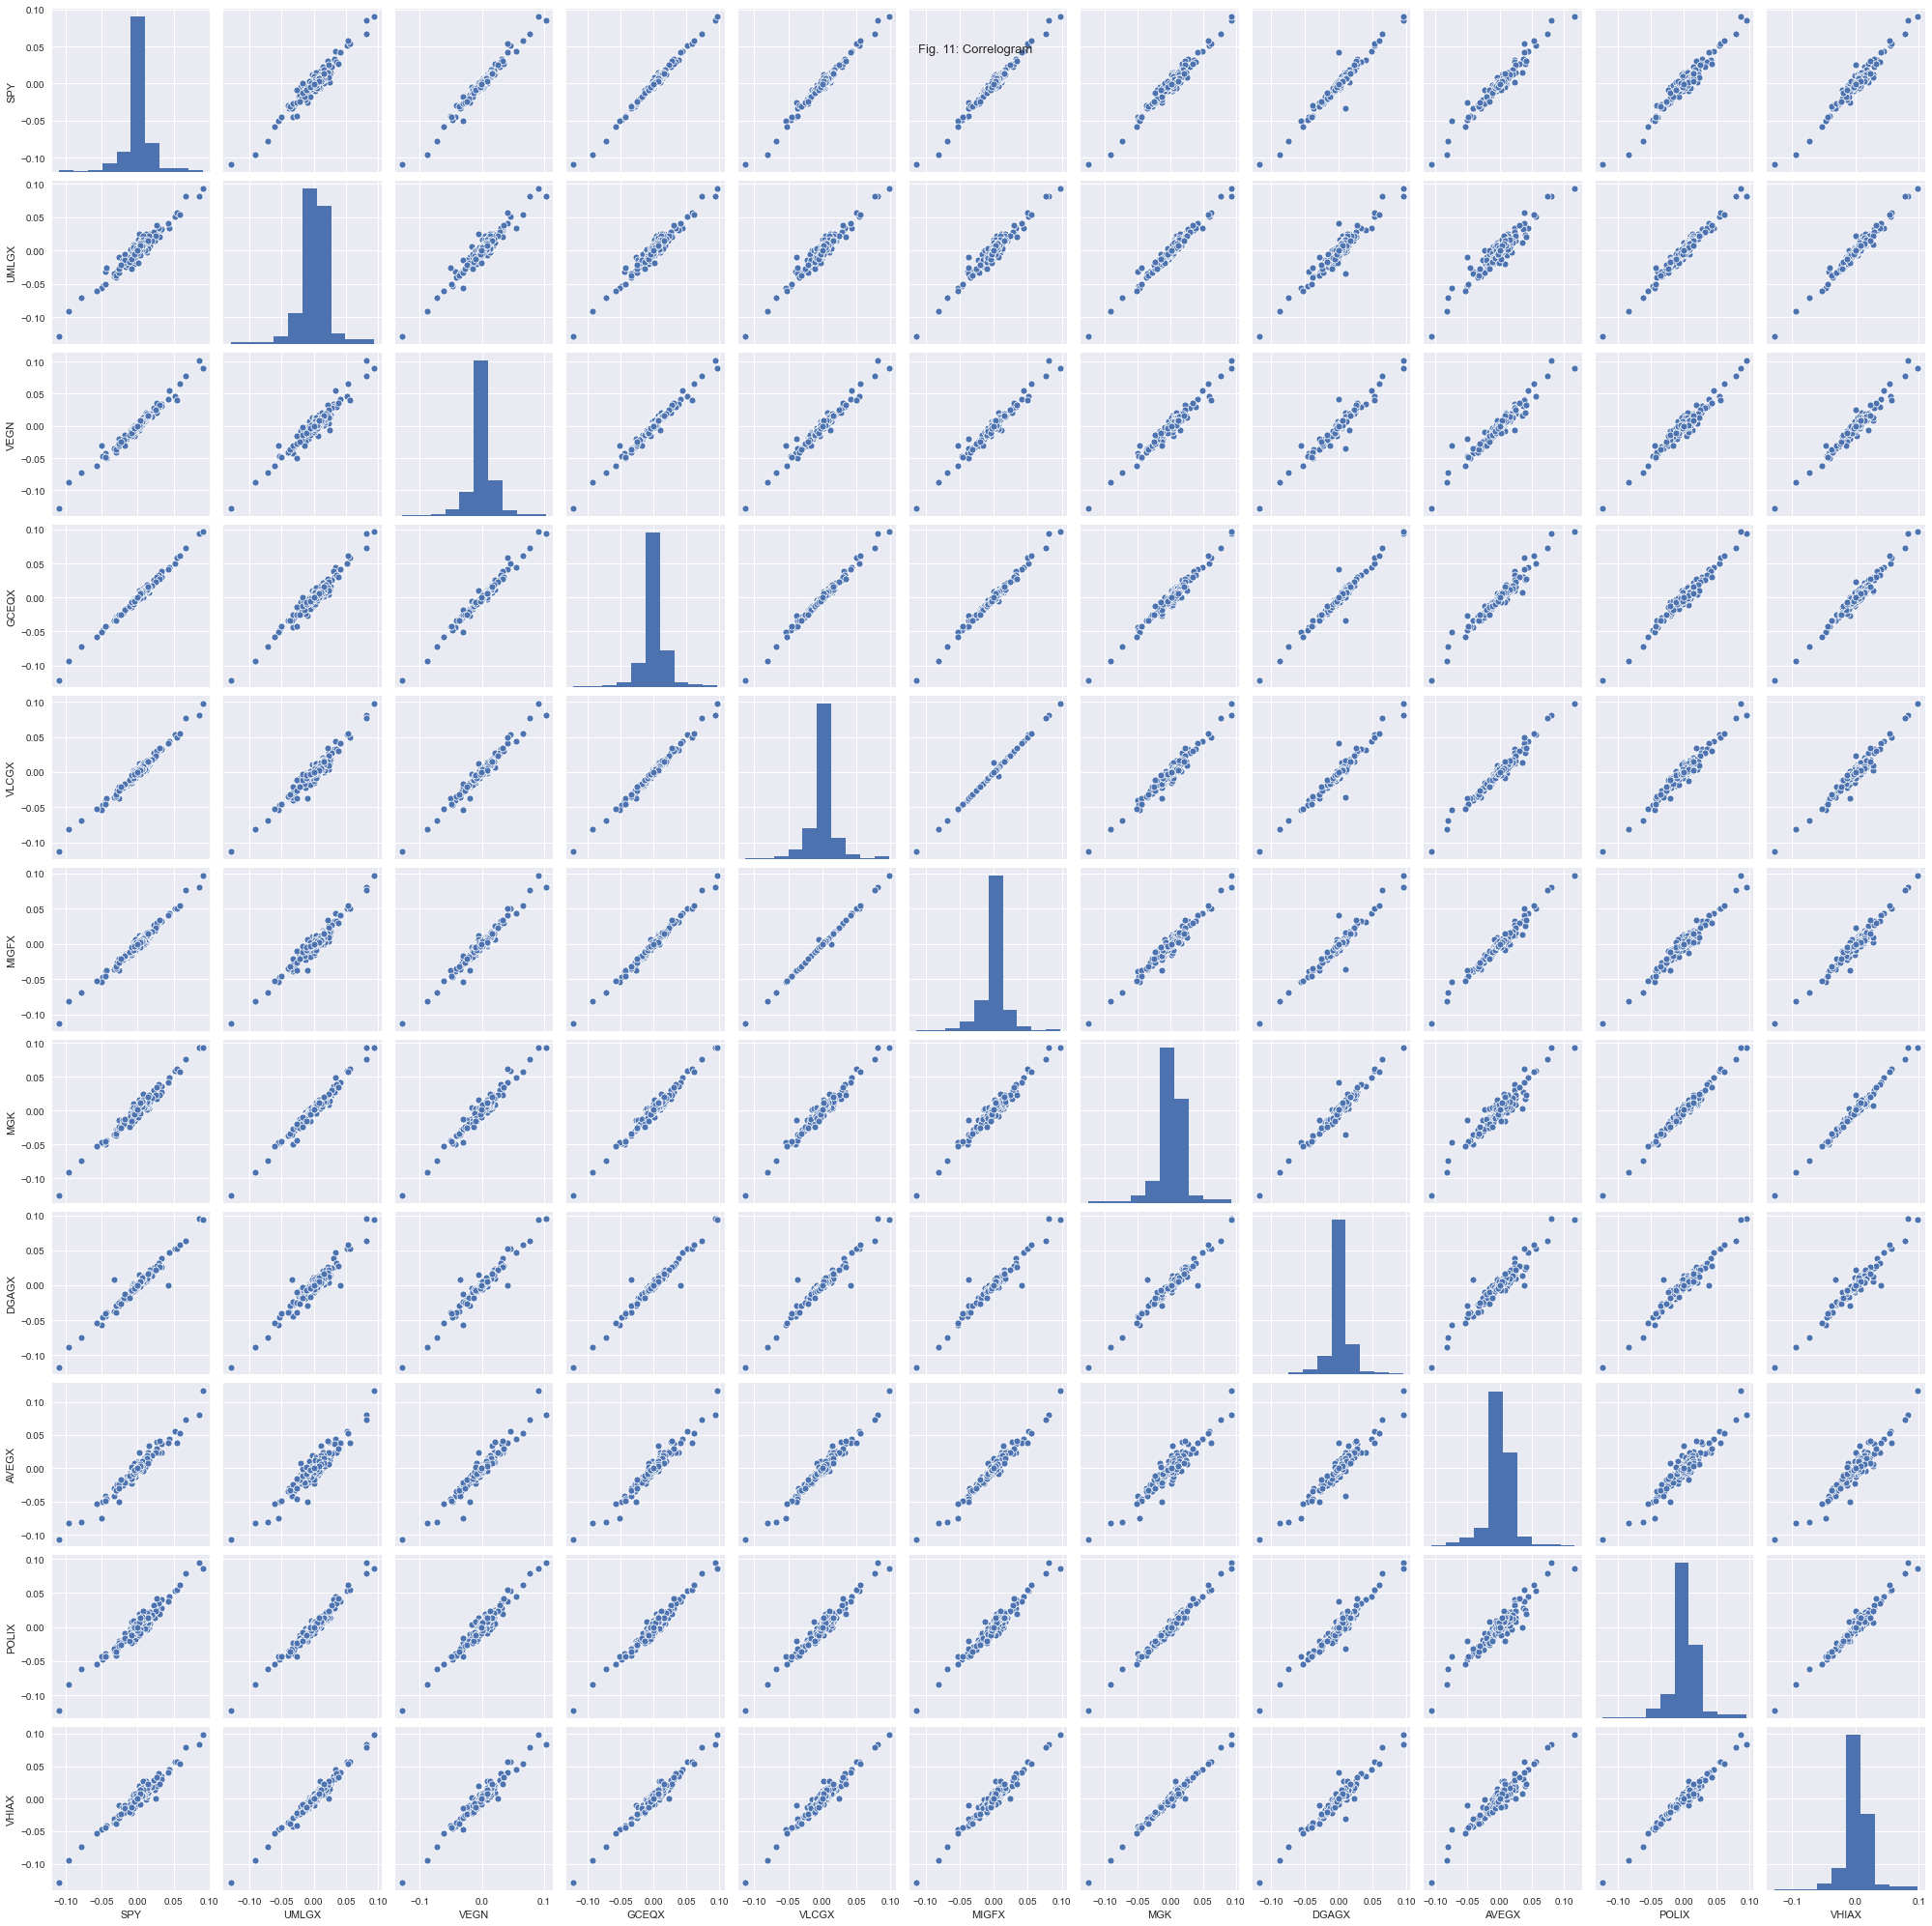

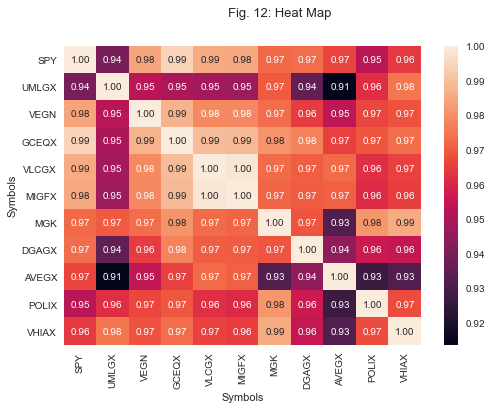

In [10]:
#Correlation between all Stocks
close_df = web.DataReader(TickersList,'yahoo', start_date, end_date)['Adj Close']
rets_df = close_df.pct_change()
#Plot the Correlogram with Seaborn
Correlogram = sns.pairplot(rets_df.dropna())
Correlogram.fig.suptitle("Fig. 11: Correlogram", fontsize=13)
#Plot Heatmap of the Correlations
fig12 = plt.subplots()
plt.suptitle('Fig. 12: Heat Map', fontsize=13)
sns.heatmap(rets_df.corr(), annot=True, fmt='.2f')

#### Code steps: 3.  Clean Data
*Generally the Daily returns have NA values on the first day of analysis as this day is used for the percentage change calculation (see below formula)*

$Percentage  Change =\frac{Today's Price - Yesterday's Price}{Yesterday's Price}$

*As a result the first days of evaluations (including the days until November missing from the VEGN (as shown in VEGN vs SPY chart) have been removed. See difference between Table 1 and Table 2 in Code steps: 4. Analyze and Visualize Data for visual help*

In [11]:
#Remove missing values
rets = rets_df.dropna()

#### Code steps: 4. Analyze and Visualize Data

Table 1: Full Dataset


,High,Low,Open,Close,Volume,Adj Close,Daily Return,log_ret,High,Low,...,Daily Return,log_ret,High,Low,Open,Close,Volume,Adj Close,Daily Return,log_ret
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,251.210007,245.949997,245.979996,250.179993,126925200.0,243.025879,NA,NA,12.9,12.9,...,NA,NA,17.66,17.66,17.66,17.66,0,16.0117,NA,NA
2019-01-03,248.570007,243.669998,248.229996,244.210007,144140700.0,237.226593,-0.0238628,-0.0241522,12.43,12.43,...,-0.0247739,-0.0250859,17.09,17.09,17.09,17.09,0,15.4949,-0.0322763,-0.0328086
2019-01-04,253.110001,247.169998,247.589996,252.389999,142628800.0,245.172668,0.0334957,0.032947,13.04,13.04,...,0.0346775,0.0340897,17.83,17.83,17.83,17.83,0,16.1659,0.0433002,0.042389
2019-01-07,255.949997,251.690002,252.690002,254.380005,103139100.0,247.105774,0.00788467,0.00785375,13.36,13.36,...,0.00584563,0.00582861,18.16,18.16,18.16,18.16,0,16.4651,0.0185081,0.0183389
2019-01-08,257.309998,254.000000,256.820007,256.769989,102512600.0,249.427399,0.00939527,0.00935141,13.5,13.5,...,0.007749,0.00771913,18.37,18.37,18.37,18.37,0,16.6555,0.0115638,0.0114975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-17,338.339996,336.850006,337.940002,337.910004,35481000.0,337.910004,0.0031766,0.00317157,14.59,14.59,...,0.00807631,0.00804387,28.72,28.72,28.72,28.72,0,28.72,0.0137663,0.0136724
2020-08-18,339.100006,336.609985,338.339996,338.640015,38733900.0,338.640015,0.00216037,0.00215804,14.67,14.67,...,0.00704057,0.0070159,28.86,28.86,28.86,28.86,0,28.86,0.0048747,0.00486285
2020-08-19,339.609985,336.619995,339.049988,337.230011,68054200.0,337.230011,-0.00416372,-0.00417242,14.6,14.6,...,-0.00120538,-0.00120611,28.76,28.76,28.76,28.76,0,28.76,-0.00346502,-0.00347103


Table 2: Daily Returns Dataset


Symbols,SPY,UMLGX,VEGN,GCEQX,VLCGX,MIGFX,MGK,DGAGX,AVEGX,POLIX,VHIAX
Date,,,,,,,,,,,
2019-09-11,0.007111,0.006107,0.002671,0.006092,0.007549,0.007134,0.006163,0.006398,0.003022,0.001265,0.007407
2019-09-12,0.003464,0.005311,0.005687,0.004541,0.007493,0.007699,0.006797,0.005450,0.006026,0.005684,0.004136
2019-09-13,-0.000664,-0.000755,-0.002135,-0.000646,-0.001144,-0.001223,-0.004006,-0.002108,0.000000,-0.002826,-0.001373
2019-09-16,-0.003089,0.000000,-0.002219,-0.005386,-0.007446,-0.007650,-0.003501,-0.006337,-0.003267,-0.005668,-0.002750
2019-09-17,0.002532,0.005287,0.004766,0.003682,0.004616,0.004934,0.005158,0.005466,0.008741,0.008233,0.005515
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-17,0.003177,0.011088,0.008548,0.007434,0.005370,0.005637,0.010152,0.004101,0.006647,0.008076,0.013766
2020-08-18,0.002160,0.005483,0.000997,0.002583,0.003739,0.003644,0.008849,0.005173,-0.001223,0.007041,0.004875
2020-08-19,-0.004164,-0.004772,-0.002922,-0.004600,-0.003193,-0.003351,-0.004873,-0.003521,-0.002449,-0.001205,-0.003465


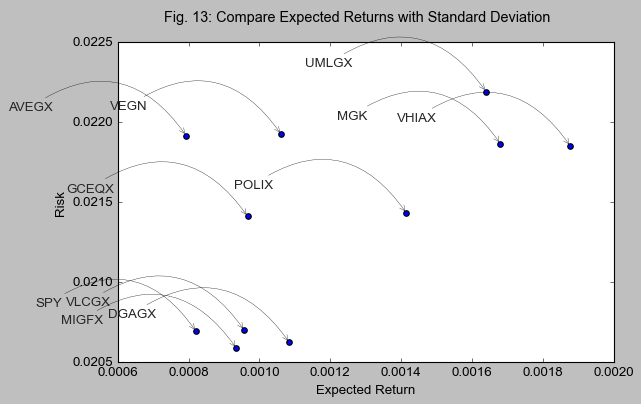

In [12]:
#Visually compare the expected return (daily returns) with the standard deviation of the daily returns
plt.style.use('classic')
plt.figure(figsize=(8,5))
plt.suptitle('Fig. 13: Compare Expected Returns with Standard Deviation', fontsize=13)
plt.scatter(rets.mean(),rets.std(),s=25)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

plt.style.use('seaborn')

#Code to add annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label, xy=(x,y),xytext=(-120,20), textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    
#Create full dataset removing missing values    
df_merged = pd.concat(alldfs, join='outer',axis=1).fillna('NA')

#Display full data set of all the Funds
print("Table 1: Full Dataset")
display(df_merged)
#Display Only Daily Returns for every Fund
print("Table 2: Daily Returns Dataset")
display(rets)

###  Project CRISP-DM steps: 4. Modelling the data

#### Code steps: 5. Model Data

In [13]:
#Predictive Analysis:
#1.Instantiate: Set up the model - The Funds selected are the best performing In terms of returns (insight derived from)
X = rets[['UMLGX', 'VEGN', 'MIGFX', 'MGK', 'VHIAX']]
y = rets['SPY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True)

#2.Fit Training: Fitting the model on the training data and trying to predict the test data
lm_model.fit(X_train, y_train)

#3.Predict Test Data: Trying to predict the test data
predictions = lm_model.predict(X_test)

#4.Score the model
print("Score:", lm_model.score(X_test, y_test))

Score: 0.9845688474130261


#### Code steps: 6. Visualize the Model

Text(0, 0.5, 'Predictions')

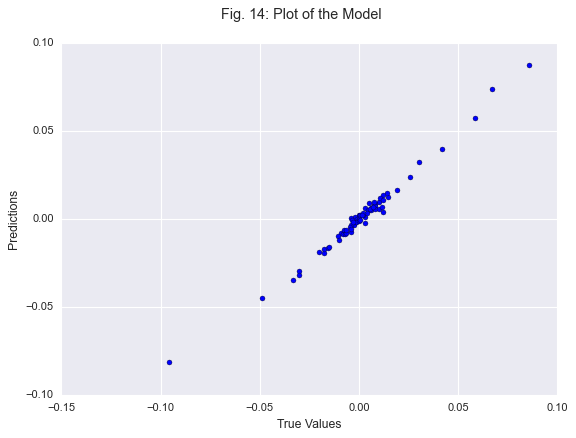

In [14]:
#Plot the Model
fig3 = plt.subplots()
plt.suptitle('Fig. 14: Plot of the Model', fontsize=13)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

###  Project CRISP-DM steps: 5. Evaluate the results

#### Are ESG Funds more volatile than the market?
The first set of 10 charts displayed as output of the *Code steps: 1. Gather & Visualize Stocks Data* shows each single fund returns versus the market returns clearly show that the much lower volatility of the ESG Funds, perhaps due to the fact that the companies included in the ESG funds are more resilient to disruptive events like Covid-19 (SPY downwards spike between March and July).

#### Are ESG Funds correlated to the market?
Both the correlogram (Figure 11) and the heat map (Figure 12) are showing that the ESG Funds are positively correlated with the market, meaning that the stocks included in the ESG Funds are also included in the SPY ETFs. This intuition along with the previous answer tells us that the risk element in the market is coming from stocks (i.e. companies which do not adhere to the Responsible Investing policies).

#### Which funds are providing higher Risk Adjusted Returns?
From Figure 13 we can say that the market is providing lower returns compare to most of the ESG Funds and confirm the intuition that responsible investing is not just a an ethic investor’s position but also a profitable choice.
Finally Figure 14 plots the predictive model which attempts to explain the market with the ESG Top performers. This is giving us a sense of the idea that investing in ESG Funds retains the positive elements of investing in the market in terms of growth and returns given the common companies in the SP500 and the ESG Funds considered.